In [1]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
import pickle
from real_grad_package import*

In [2]:
#################Example with single input vector######################

#Polynomial defined in the file. Forward and Backward array matrices are returned from the parsing function
filename = 'custom4_4.poly'
F_mat, B_mat = parse_poly(filename)

#Number of variables
N = F_mat.shape[0]
#Number of monomials
M = F_mat.shape[1]
#Object of class real_grad. All defined circuit parameters are defined in the constructor function of the class. Custom parameters
#can be passed through the arguments
test_network = real_grad(N,M,F_mat,B_mat,do_xbar_variation=1)

#define an arbitrary variable vector within the range specified by self.xmin < < self.xmax
v_arr_ideal = np.array([0.9,0.2,1,0.6]).reshape(1,4)

#Ideal gradients are calculated by an exact polynomial derivative evaluating function
v_arr_real = v_arr_ideal + test_network.vb1
idealGrad = get_IdealRealGradient(B_mat,v_arr_ideal)
print(idealGrad)

#real grads computed by behavioural modeling of circuit blocks.
realGrad = test_network.get_realGradient(v_arr_real)
print(realGrad)

[[5.12  5.04  4.068 0.18 ]]
[[5.06309113 4.93709026 3.87992919 0.16287727]]


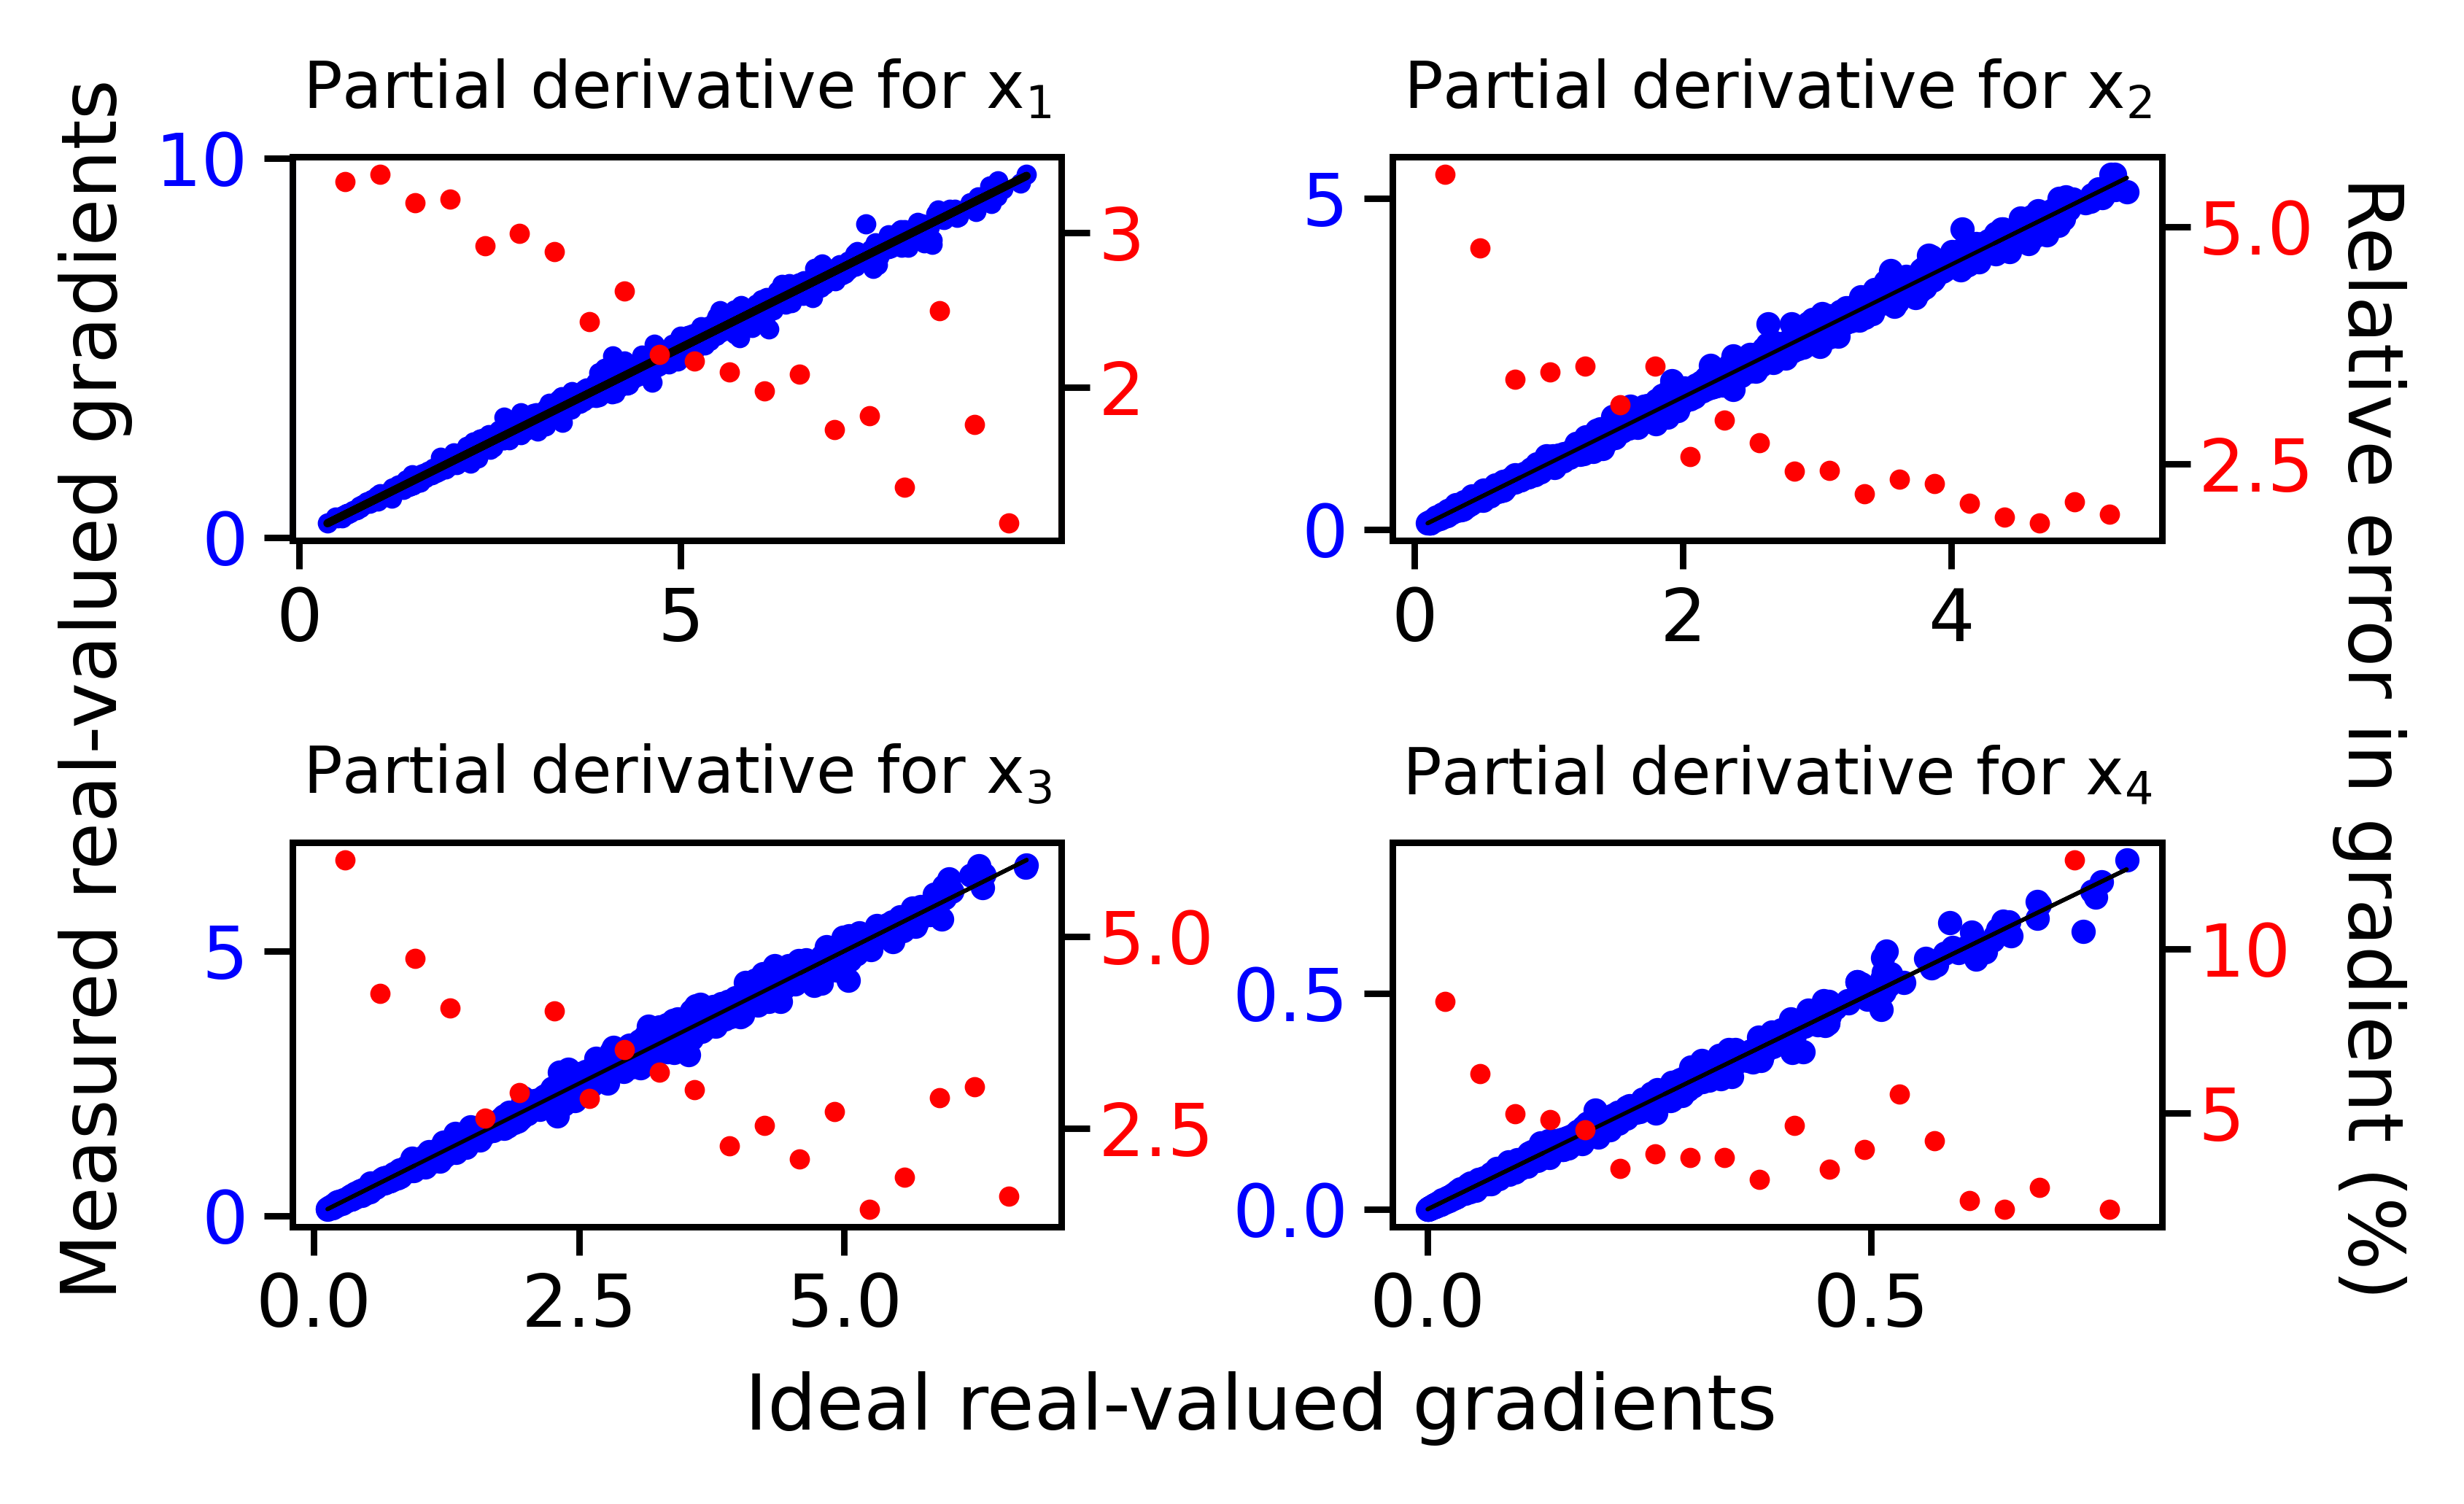

In [5]:
######################Code to generate Fig. S24#######################
filename = 'custom4_4.poly'
F_mat, B_mat = parse_poly(filename)
N = F_mat.shape[0]
M = F_mat.shape[1]
num_iters = 1000
idealGrad_mat = np.zeros((num_iters,N))
realGrad_mat = np.zeros((num_iters,N))
for i in range(num_iters):
    test_network = real_grad(N,M,F_mat,B_mat,do_xbar_variation=1)
    v_arr_ideal = np.random.uniform(xmin,xmax,N).reshape(1,N)
    v_arr_real = v_arr_ideal + test_network.vb1
    idealGrad = get_IdealRealGradient(B_mat,v_arr_ideal)
    realGrad = test_network.get_realGradient(v_arr_real)
    #print(realGrad)
    idealGrad_mat[i,] = idealGrad[0,]
    realGrad_mat[i,] = realGrad[0,]
    
err_mat = np.divide(np.abs(idealGrad_mat - realGrad_mat),idealGrad_mat)*100
num_steps = 20

fig = plt.figure(
    figsize=(4,2.5), dpi=800, tight_layout=True
)
ax = fig.add_subplot(2,2,1)
ax.spines['right'].set_color('red')
ax.spines['left'].set_color('blue')
ax.plot(idealGrad_mat[:,0].reshape(-1),realGrad_mat[:,0].reshape(-1),'ob',markersize=1.5)
ax.plot(idealGrad_mat[:,0].reshape(-1),idealGrad_mat[:,0].reshape(-1),'k',linewidth=1.0)

var_ind = 0
ax2 = ax.twinx()
max_val = np.max(idealGrad_mat[:,var_ind])
min_val = np.min(idealGrad_mat[:,var_ind])
step = (max_val-min_val)/num_steps
err_xaxis = np.arange(min_val,max_val+step,step)
err_xaxis_v2 = []
err_yaxis_v2 = []
for i in range(len(err_xaxis)-1):
    ind1 = np.where(idealGrad_mat[:,var_ind]>=err_xaxis[i])[0]
    ind2 = np.where(idealGrad_mat[:,var_ind]<=err_xaxis[i+1])[0]
    err_xaxis_v2.append((err_xaxis[i]+err_xaxis[i+1])/2)
    err_yaxis_v2.append(np.mean(err_mat[np.intersect1d(ind1,ind2),var_ind]))
ax2.plot(err_xaxis_v2,err_yaxis_v2,'or',markersize=1.5)
ax.tick_params('x', labelsize=9, pad=2)
ax.tick_params(axis="y", labelsize=9, pad=2, labelcolor='b')
ax2.tick_params(axis="y", labelsize=9, pad=1, labelcolor='r')
ax.set_title('Partial derivative for x$_{1}$',fontsize=8)

ax = fig.add_subplot(2,2,2)
ax.plot(idealGrad_mat[:,1].reshape(-1),realGrad_mat[:,1].reshape(-1),'ob',markersize=2)
ax.plot(idealGrad_mat[:,1].reshape(-1),idealGrad_mat[:,1].reshape(-1),'k',linewidth=0.5)

var_ind = 1
ax2 = ax.twinx()
max_val = np.max(idealGrad_mat[:,var_ind])
min_val = np.min(idealGrad_mat[:,var_ind])
step = (max_val-min_val)/num_steps
err_xaxis = np.arange(min_val,max_val+step,step)
err_xaxis_v2 = []
err_yaxis_v2 = []
for i in range(len(err_xaxis)-1):
    ind1 = np.where(idealGrad_mat[:,var_ind]>=err_xaxis[i])[0]
    ind2 = np.where(idealGrad_mat[:,var_ind]<=err_xaxis[i+1])[0]
    err_xaxis_v2.append((err_xaxis[i]+err_xaxis[i+1])/2)
    err_yaxis_v2.append(np.mean(err_mat[np.intersect1d(ind1,ind2),var_ind]))
ax2.plot(err_xaxis_v2,err_yaxis_v2,'or',markersize=1.5)
ax.tick_params('x', labelsize=9, pad=2)
ax.tick_params(axis="y", labelsize=9, pad=2, labelcolor='b')
ax2.tick_params(axis="y", labelsize=9, pad=1, labelcolor='r')
ax.set_title('Partial derivative for x$_{2}$',fontsize=8)

ax = fig.add_subplot(2,2,3)
ax.plot(idealGrad_mat[:,2].reshape(-1),realGrad_mat[:,2].reshape(-1),'ob',markersize=2)
ax.plot(idealGrad_mat[:,2].reshape(-1),idealGrad_mat[:,2].reshape(-1),'k',linewidth=0.5)

var_ind = 2
ax2 = ax.twinx()
max_val = np.max(idealGrad_mat[:,var_ind])
min_val = np.min(idealGrad_mat[:,var_ind])
step = (max_val-min_val)/num_steps
err_xaxis = np.arange(min_val,max_val+step,step)
err_xaxis_v2 = []
err_yaxis_v2 = []
for i in range(len(err_xaxis)-1):
    ind1 = np.where(idealGrad_mat[:,var_ind]>=err_xaxis[i])[0]
    ind2 = np.where(idealGrad_mat[:,var_ind]<=err_xaxis[i+1])[0]
    err_xaxis_v2.append((err_xaxis[i]+err_xaxis[i+1])/2)
    err_yaxis_v2.append(np.mean(err_mat[np.intersect1d(ind1,ind2),var_ind]))
ax2.plot(err_xaxis_v2,err_yaxis_v2,'or',markersize=1.5)
ax.tick_params('x', labelsize=9, pad=2)
ax.tick_params(axis="y", labelsize=9, pad=2, labelcolor='b')
ax2.tick_params(axis="y", labelsize=9, pad=1, labelcolor='r')
ax.set_title('Partial derivative for x$_{3}$',fontsize=8)

ax = fig.add_subplot(2,2,4)
ax.plot(idealGrad_mat[:,3].reshape(-1),realGrad_mat[:,3].reshape(-1),'ob',markersize=2)
ax.plot(idealGrad_mat[:,3].reshape(-1),idealGrad_mat[:,3].reshape(-1),'k',linewidth=0.5)

var_ind = 3
ax2 = ax.twinx()
max_val = np.max(idealGrad_mat[:,var_ind])
min_val = np.min(idealGrad_mat[:,var_ind])
step = (max_val-min_val)/num_steps
err_xaxis = np.arange(min_val,max_val+step,step)
err_xaxis_v2 = []
err_yaxis_v2 = []
for i in range(len(err_xaxis)-1):
    ind1 = np.where(idealGrad_mat[:,var_ind]>=err_xaxis[i])[0]
    ind2 = np.where(idealGrad_mat[:,var_ind]<=err_xaxis[i+1])[0]
    err_xaxis_v2.append((err_xaxis[i]+err_xaxis[i+1])/2)
    err_yaxis_v2.append(np.mean(err_mat[np.intersect1d(ind1,ind2),var_ind]))
ax2.plot(err_xaxis_v2,err_yaxis_v2,'or',markersize=1.5)
ax.tick_params('x', labelsize=9, pad=2)
ax.tick_params(axis="y", labelsize=9, pad=2, labelcolor='b')
ax2.tick_params(axis="y", labelsize=9, pad=1, labelcolor='r')
ax.set_title('Partial derivative for x$_{4}$',fontsize=8)

plt.figtext(0.006, 0.10, 'Measured real-valued gradients',rotation=90,fontsize=9.5)
plt.figtext(0.98, 0.10, 'Relative error in gradient (%)',rotation=270,fontsize=9.5)
plt.figtext(0.3, 0, 'Ideal real-valued gradients',fontsize=9.5)
#plt.savefig("figsx14.jpg",bbox_inches = 'tight',dpi=800)   
plt.show()

In [4]:
k = math.floor(1+((math.log(test_network.xmax)-(test_network.vth_min/test_network.m2))/math.log(test_network.xmin)))
print("Maximum possible K: ",k)
coeff_precision = math.floor((test_network.vt0 - test_network.vth_min)/(test_network.m2*math.log(2)))
print("Monomial coefficient precision: ",coeff_precision)

Maximum possible K:  5
Monomial coefficient precision:  5
